
# Free spinless fermions in a ladder with nearest-neightbour interactions: <br/> dissipative entanglement dynamics




## 1. Theory

This quantum many body toy model constitutes a first stab at the problem of entanglement dynamics, in particular in the frame of open systems. Consider two fermionic rings with nearest-neightbour interaction ($J_i$) coupled to each other via a nearest-neightbour interaction ($\lambda$).

<img src="tambor_fermionico.jpg" width="500" height="500" >

The Hamiltonian is naturally given by
$$
H = J_A \sum_{j=1}^L(c^\dagger_{j,A} c_{j+1,A}+h.c.)+ J_B \sum_{j=1}^L(c^\dagger_{j,B} c_{j+1,B}+h.c.)+\lambda\sum_{j=1}^L(c^\dagger_{j,A} c_{j,B}+h.c.),
$$
where $c_{i,\alpha}^\dagger$ and $c_{i,\alpha}$ create and annhilate a spinless fermion at the $i$-th site of ring $\alpha$, respectively.
We are interested in studying the entanglement dynamics as half of the chain is inmmersed in a bath (i.e. in contact with the exterior). We thus named the top ring $A$ and the bottom ring $B$ which we will surmerge in the bath. We will study the entanglement dynamics between two subdivisions of $A = A_1 \cup A_2$ as $B$ is bathed at time $t=0$. For this we will calculate the (logarithmic) entanglement negativity $\mathcal{N}(t)$ between $A_1$ and $A_2$ which we remind the reader is given by 
$$
\mathcal{N}(t)\equiv \mathcal{N}[\rho_{A}(t)] =  \log_2 ||\rho_{A}^{\Gamma_{A_1}}(t)||_1,
$$
where $\rho_{A}(t) = \text{Tr}_B \rho (t)$, the density matrix describing subsystem $A$ and $\rho_A(t)^{\Gamma_{A_1}}$ is the partial transposition of $\rho_A(t)$ wrt subsystem $A_1$.

Naturally, one exploits the translational symmetries of the rings to cast $H$ in a diagonal form:
$$
H = \sum_{k=1}^{2L} \epsilon_k f^\dagger_k f_k \quad \text{with} \quad \epsilon_k = \begin{cases} 
      2J\cos(2 \pi k/L)+ \lambda  &  1 \leq k \leq L \\
      2J\cos(2 \pi k/L)- \lambda & L+1 \leq k \leq 2L  
   \end{cases} 
$$
where
$$
c_{j,A} = \frac{1}{\sqrt{2L}}\sum^L_{k=1} e^{-ijk2\pi/L}(f_k + f_{k+L}) \iff f_k = \frac{1}{\sqrt{2L}}\sum^L_{k=1} e^{ijk2\pi/L}(c_{j,B} + c_{j,B}) \\
c_{j,B} = \frac{1}{\sqrt{2L}}\sum^L_{k=1} e^{-ijk2\pi/L}(f_k - f_{k+L}) \iff f_{k+L} = \frac{1}{\sqrt{2L}}\sum^L_{k=1} e^{ijk2\pi/L}(c_{j,A} - c_{j,B})
$$
and their hermitian conjugated siblings.

## 2. Numerical verification

Before jumping straight into the main calculations, lets verify that we have diagonalised correctly $H$ and plot its spectrum. In the thermodynamic limit, $L\rightarrow \infty \implies k/L\in [0,2]$, i.e. the spectrum is continuous with $\sigma \doteq k/L$:
$$
\epsilon(\sigma) = \begin{cases} 
      2J\cos(2 \pi \sigma)+ \lambda  &  0 < \sigma \leq 1 \\
      2J\cos(2 \pi \sigma)- \lambda & 1 < \sigma \leq 2 
   \end{cases} 
$$

In [1]:
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import matplotlib.pyplot as plt
import numpy as np

def spectrum(J,lamb):
    k_1 = np.arange(0,1,0.001)
    k_2 = np.arange(1,2,0.001)
    E_1 = 2*J*np.cos(2*np.pi*k_1) + lamb
    E_2 = 2*J*np.cos(2*np.pi*k_2) - lamb
    plt.plot(k_1, E_1)
    plt.plot(k_2, E_2)
    plt.xlabel('k')
    plt.ylabel('E(k)')

interact(spectrum, J=widgets.FloatSlider(value=1,min=0,max=5,step=0.5), lamb = widgets.FloatSlider(value=2,min=0,max=5.0,step=0.5));

interactive(children=(FloatSlider(value=1.0, description='J', max=5.0, step=0.5), FloatSlider(value=2.0, descr…

And now for the numerical solution using `QuTip` for a system with rings of finite size.

In [2]:
from IPython.display import Image
from qutip import *
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt

L =  1000
J = 1
lamb = 4

We first need to define spinless fermion operators $c_i, c^\dagger_i$ to define $H$. Now, instead of working with a Hilbert space of two rings tensored together $\mathcal{H}=\mathcal{H}_A\otimes\mathcal{H}_B$ we will for simplicity just work with a large enough Hilbert space $\dim \mathcal{H} = 2^{2L}$ and fit one chain after the other matching the interactions as required by $H$.

In [14]:
def id():
    op_list = []
    for i in range(2*L):
        op_list.append(qeye(2))
    op = Qobj(tensor(op_list))
    return op

def sigma_z(k):
    op_list = []
    if k<=2*L-1 and k>=0:
        for i in range(2*L):
            if i==k:
                op_list.append(sigmaz())
            else:
                op_list.append(qeye(2))
        op = Qobj(tensor(op_list))
        return op

    else:
        raise ValueError("Index out of range: Operator sigma_z_"+str(k)+" may not be casted in a system with "+str(2*L)+" spins. By convention first spin is labeled as 0.")

def c(k):
    if k<=2*L-1 and k>=0:
        op_list = []
        for i in range(2*L):
            if i==k:
                op_list.append(destroy(2))
            else:
                op_list.append(qeye(2))
        aux = Qobj(tensor(op_list))
        phase = Qobj(tensor([qeye(2)]*(2*L)))
        for i in range(0,k):
            phase = phase*sigma_z(i)
        op = phase*aux
        return op

    else:
        raise ValueError("Index out of range: Operator c_"+str(k)+" may not be casted in a system with "+str(2*L)+" spins. By convention first spin is labeled as 0.")

Defining $H$:

In [4]:
h = np.zeros((2*L,2*L))              #note the 2*L
for i in range(2*L):
    if i!=L-1 and i!=2*L-1:          #hopping term
        h[i,i+1]=J
    if i<L:                          #interaction term
        h[i,i+L]=lamb
    if i==L-1:                       #periodic bc in ring B
        h[i,0]=J
    if i==2*L-1:                     #periodic bc in ring A
        h[i,L]=J
h += h.T                             #fill remaining diagonal

# hinton(Qobj(h));                   #for visualing the matrix

Which in the fermionic operator basis (above fig.) has the following spectrum:

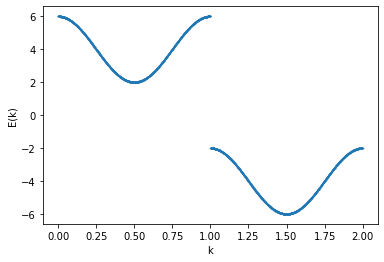

In [5]:
eigenvals = LA.eigvalsh(h)

ordered_e = []                          #reordering eigenvalues to match anaytical result
for i in reversed(range(L//2,L)):
    ordered_e.append(eigenvals[2*i])
for i in range(L//2,L):
    ordered_e.append(eigenvals[2*i+1])
for i in reversed(range(L//2)):
    ordered_e.append(eigenvals[2*i])
for i in range(L//2):
    ordered_e.append(eigenvals[2*i+1])
    
k = [2*i/len(eigenvals) for i in range(len(eigenvals))]  #plotting them
plt.scatter(k, ordered_e,s=0.5);
plt.xlabel('k');
plt.ylabel('E(k)');

Which is identical to the analytical plot for 2000 fermions. Let's reduce $L$ back to a computable system size and cast $H$ into a `QuTiP` object in the computational basis. We find the spectrum and eigenstates of $H$ for latter combinience

In [6]:
L = 2

h = np.zeros((2*L,2*L))              #note the 2*L
for i in range(2*L):
    if i!=L-1 and i!=2*L-1:          #hopping term
        h[i,i+1]=J
    if i<L:                          #interaction term
        h[i,i+L]=lamb
    if i==L-1:                       #periodic bc in ring B
        h[i,0]=J
    if i==2*L-1:                     #periodic bc in ring A
        h[i,L]=J
h += h.T                             #fill remaining diagonal

H = Qobj(tensor([Qobj(np.zeros((2,2)))]*(2*L)))   #define H as a qutip obj.

for i in range(2*L):                              
    for j in range(2*L):
        H += h[i,j]*c(i).dag()*c(j)                                  

E,V = H.eigenstates()                #solve for H's eigensystem

Let's introduce now some dissipation into the model: we will bath ring $B$, that is, the ring that in `Python` goes from position `0` to position `L-1`. For this we will deploy the Lindbland equation 
$$
{\displaystyle {\dot {\rho}(t)}=-{i \over \hbar }[H,\rho(t) ]+\sum _{i=1}^{N^{2}-1}\gamma _{i}\left(L_{i}\rho(t) L_{i}^{\dagger }-{\frac {1}{2}}\left\{L_{i}^{\dagger }L_{i},\rho(t) \right\}\right),}
$$
where $\gamma_i$ is some system-bath coupling constant and $L_i, L_i^\dagger$ are the so called collapse operators and are in someway the action of the bath on the system (for a more detailed definition of $L_i, L_i^\dagger$ see the standard literature). We will use the above equation in an axiomatic manner, that is, we will use it as if it is an universal true axiom for the description of open quantum systems (of course it is not) and define at will what  $H, L_i, L_i^\dagger$ and $\gamma_i$ are.

Thus, we _define_ $H$ to be our previous Hamiltonian and
$$
L_i = \sqrt{\Gamma_d} c_i \quad L_i^\dagger = \sqrt{\Gamma_u} c_i^\dagger \quad  \text{with} \quad 1\leq i \leq L
$$
the square root in the constants $\sqrt{\Gamma_d},\sqrt{\Gamma_u}$ is for latter convinience. We define those in `Python` and store them into the `c_ops` `list` for "collapse operator":

In [7]:
gamma_u = 0
gamma_d = 1

c_ops = []
for i in range(L):
    c_ops.append(np.sqrt(gamma_d)*c(i))
    c_ops.append(np.sqrt(gamma_u)*c(i).dag())

Lets compute what happens to the **total** population at ring $B$ of an initial eigenstate $\rho_0 = |\psi_i\rangle \langle \psi_i |$ as we submerge ring $B$ in the above defined bath via $L_i,L_i^\dagger$:

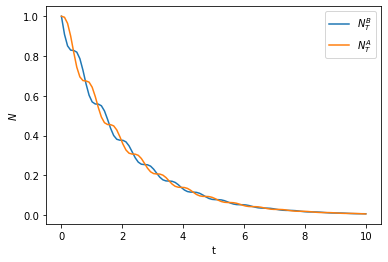

In [8]:
rho_0 = V[len(V)//2]*V[len(V)//2].dag()              #chose middle lying eigenstate

n_B = Qobj(tensor([Qobj(np.zeros((2,2)))]*(2*L)))    #total ring B number op
for i in range(L):
    n_B += c(i).dag()*c(i)

n_A =  Qobj(tensor([Qobj(np.zeros((2,2)))]*(2*L)))   #total ring A number op
for i in range(L,2*L):
    n_A += c(i).dag()*c(i)

time_array = np.linspace(0.0, 10.0, 100)             #time array for numerical solver
rho_t = mesolve(H, rho_0, time_array, c_ops, [n_B,n_A])

plt.plot(time_array, rho_t.expect[0],label=r'$N^B_T$');
plt.plot(time_array, rho_t.expect[1],label=r'$N^A_T$');
plt.xlabel('t');
plt.ylabel(r'$N$');
plt.legend();

As seen above, the population in the unbathed ring $A$ is eventually influenced by the bathed ring $B$ facing eventually the same destiny. What if the initial state is simply one single fermion in bathed ring $B$:

/home/alex/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


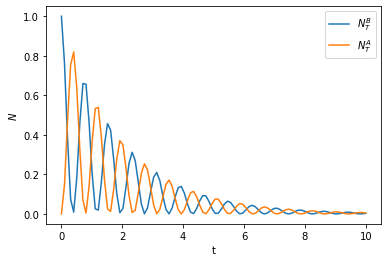

In [9]:
vac = Qobj(basis((2*L)**2,0), dims = [[2]*2*L,[1]], shape = (4**L,1))    #vacuum state

rho_0 =  c(0).dag()*vac*vac.dag()*c(0)                                   #one single fermion in ring B                    

n_B = Qobj(tensor([Qobj(np.zeros((2,2)))]*(2*L)))                        #total ring B number op
for i in range(L):
    n_B += c(i).dag()*c(i)

n_A =  Qobj(tensor([Qobj(np.zeros((2,2)))]*(2*L)))                       #total ring A number op
for i in range(L,2*L):
    n_A += c(i).dag()*c(i)

time_array = np.linspace(0.0, 10.0, 100)                                 #time array for numerical solver
rho_t = mesolve(H, rho_0, time_array, c_ops, [n_B,n_A])

plt.plot(time_array, rho_t.expect[0],label=r'$N^B_T$');
plt.plot(time_array, rho_t.expect[1],label=r'$N^A_T$');
plt.xlabel('t');
plt.ylabel(r'$N$');
plt.legend();

What if the initial state is simply one single fermion in unbathed ring $A$:

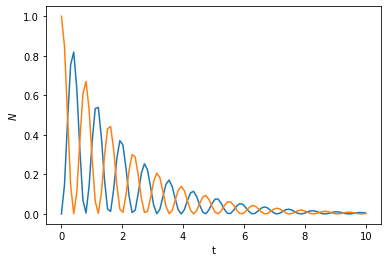

In [10]:
rho_0 =  c(L).dag()*vac*vac.dag()*c(L)                        #one single fermion in ring A                                           

time_array = np.linspace(0.0, 10.0, 100)              
#time array for numerical solver
rho_t = mesolve(H, rho_0, time_array, c_ops, [n_B,n_A])

plt.plot(time_array, rho_t.expect[0]);
plt.plot(time_array, rho_t.expect[1]);
plt.xlabel('t');
plt.ylabel(r'$N$');

## 3. Solving the Lindbland equation analytically

The aim of this section is to solve the Lindbland equation for our previous system of two rings, one coupled to a bath. This is in principle a doable task as in the diagonal basis the problem is dual to a fully bathed system:

<ins>**Proof:**</ins> 
The proof is trivial now that we managed to diagonalise $H$. Recall that $H$ was
$$
H = J_A \sum_{j=1}^L(c^\dagger_{j,A} c_{j+1,A}+h.c.)+ J_B \sum_{j=1}^L(c^\dagger_{j,B} c_{j+1,B}+h.c.)+\lambda\sum_{j=1}^L(c^\dagger_{j,A} c_{j,B}+h.c.),
$$
but we found
$$
H = \sum_{k=1}^{2L} \epsilon_k f^\dagger_k f_k \quad \text{with} \quad \epsilon_k = \begin{cases} 
      2J\cos(2 \pi k/L)+ \lambda  &  1 \leq k \leq L \\
      2J\cos(2 \pi k/L)- \lambda & L+1 \leq k \leq 2L  
   \end{cases} 
$$
where
$$
c_{j,A} = \frac{1}{\sqrt{2L}}\sum^L_{k=1} e^{-ijk2\pi/L}(f_k + f_{k+L}) \iff f_k = \frac{1}{\sqrt{2L}}\sum^L_{j=1} e^{ijk2\pi/L}(c_{j,A} + c_{j,B}) \quad (1 \leq k \leq L)\\
c_{j,B} = \frac{1}{\sqrt{2L}}\sum^L_{k=1} e^{-ijk2\pi/L}(f_k - f_{k+L}) \iff f_{k+L} = \frac{1}{\sqrt{2L}}\sum^L_{j=1} e^{ijk2\pi/L}(c_{j,A} - c_{j,B}) \quad (1 \leq k \leq L)
$$
so the collapse operators
$$
L_j = \sqrt{\Gamma_d} c_j \quad L_j^\dagger = \sqrt{\Gamma_u} c_j^\dagger \quad  \text{with} \quad 1\leq j \leq L 
$$
 now read
$$
 L_j = \sqrt{ \frac{\Gamma_d}{2L}}\sum^L_{k=1} e^{-ijk2\pi/L}(f_k + f_{k+L})= \sqrt{ \frac{\Gamma_d}{2L}}\sum^{2L}_{k=1} e^{-ijk2\pi/L}f_k \quad  \text{with} \quad 1\leq j \leq L \\ \quad L_j^\dagger = \sqrt{ \frac{\Gamma_u}{2L}}\sum^L_{k=1} e^{ijk2\pi/L}(f_k^\dagger + f_{k+L}^\dagger) = \sqrt{ \frac{\Gamma_u}{2L}}\sum^{2L}_{k=1} e^{ijk2\pi/L}f_k^\dagger  \quad  \text{with} \quad 1\leq j \leq L.
$$
Hence, the Lindbland equation (we've included the constants $\gamma_j$ inside the $L_j$'s)
$$
{\displaystyle {\dot {\rho}(t)}=-{i }[H,\rho(t) ]+\sum _{j=1}^{N^{2}-1}\gamma _{j}\left(L_{j}\rho(t) L_{j}^{\dagger }-{\frac {1}{2}}\left\{L_{j}^{\dagger }L_{j},\rho(t) \right\}\right),}
$$
is now
$$
{\displaystyle {\dot {\rho}(t)}=-{i  }\left[\sum_k^{2L}E_k f^\dagger_k f_k,\rho(t) \right]+\sum _{j=1}^{L}\sum^{2L}_{k=1}\sum^{2L}_{k'=1}\frac{\Gamma_d}{2L} e^{-ij(k-k')2\pi/L} \left(f_k\rho(t) f_{k'}^{\dagger }-{\frac {1}{2}}\left\{f_{k'}^{\dagger }f_k,\rho(t) \right\}\right)} \\ + \sum _{j=1}^{L}\sum^{2L}_{k=1}\sum^{2L}_{k'=1}\frac{\Gamma_u}{2L} e^{-ij(k-k')2\pi/L} \left( f_{k'}^{\dagger }\rho(t) f_k-{\frac {1}{2}}\left\{f_k f_{k'}^{\dagger },\rho(t) \right\}\right)
$$
by integrating out the $j$ sum one drops a $\delta_{k,k'}$ which in turn allows to integrate out the $k'$ sum trivially. One is left with
$$
{\displaystyle {\dot {\rho}(t)}=-{i}\left[\sum_k^{2L}E_k f^\dagger_k f_k,\rho(t) \right]+\sum^{2L}_{k=1}\frac{\Gamma_d}{2} \left(f_k\rho(t) f_{k}^{\dagger }-{\frac {1}{2}}\left\{f_{k}^{\dagger }f_k,\rho(t) \right\}\right)} + \sum^{2L}_{k=1}\frac{\Gamma_u}{2} \left(f_k^{\dagger }\rho(t) f_k-{\frac {1}{2}}\left\{f_k f_k^{\dagger },\rho(t) \right\}\right) \quad \text{Q.E.D}
$$
which is dual to a fully bathed free fermionic system with $2L$ fermions with half the bath strength. 

<ins>**Solution:**</ins> 
From Prosen's technology we know that if $\Gamma_u = \Gamma_d = \Gamma$ the density matrix $\rho$ in the diagonal basis $\{f_j\}$ evolves in time according to 
$$
\rho(t)=\frac{1}{4^{L}} \prod^{2L}_{k=1} \left[1+(-1)^{\alpha_k}e^{-\beta t}(1-2 f_k^\dagger f_k)\right],
$$
whenever the initial state $\rho(t_0)$ is an eigenstate of $H$ where the set $\{\alpha_k \in\{0,1\} \}$ indicate which initial eigenstate $\rho(t_0)$ is and $\beta$ depends on $\Gamma$. 

If we cast $\rho(t)$ in the computational basis (occupation basis) associated to the $\{f_k\}$ operator one represents $\rho(t)$ as
$$
\begin{align}
\rho(t)=&\frac{1}{4^{L}} \sum_{a_1,\cdots,a_{2L}=0}^1 |a_1, \cdots, a_{2L} \rangle \langle a_1, \cdots, a_{2L} | \prod^{2L}_{k=1} \left[1+(-1)^{\alpha_k}e^{-\beta t}(1-2 f_k^\dagger f_k)\right]  \sum_{b_1,\cdots,b_{2L}=0}^1 |b_1, \cdots, b_{2L} \rangle \langle b_1, \cdots, b_{2L} | \\
=&\frac{1}{4^{L}} \sum_{a_1,\cdots,a_{2L}=0}^1  \sum_{b_1,\cdots,b_{2L}=0}^1  |a_1, \cdots, a_{2L} \rangle \langle a_1, \cdots, a_{2L} | \prod^{2L}_{k=1} \left[1+(-1)^{\alpha_k}e^{-\beta t}(1-2 f_k^\dagger f_k)\right] |b_1, \cdots, b_{2L} \rangle \langle b_1, \cdots, b_{2L} | \\
=&\frac{1}{4^{L}} \sum_{a_1,\cdots,a_{2L}=0}^1  \sum_{b_1,\cdots,b_{2L}=0}^1  |a_1, \cdots, a_{2L} \rangle \langle a_1, \cdots, a_{2L} |\prod^{2L}_{k=1} \left[1+(-1)^{\alpha_k}e^{-\beta t}(1-2 b_k)\right] |b_1, \cdots, b_{2L} \rangle \langle b_1, \cdots, b_{2L} | \\
=&\frac{1}{4^{L}} \sum_{a_1,\cdots,a_{2L}=0}^1  \underbrace{\prod^{2L}_{k=1} \left[1+(-1)^{\alpha_k}e^{-\beta t}(1-2 a_k)\right]} |a_1, \cdots, a_{2L} \rangle \langle a_1, \cdots, a_{2L} |  \\
\doteq& \sum_{a_1,\cdots,a_{2L}=0}^1  \eta\Big(t,\beta,(\alpha_1,\cdots,\alpha_{2L}),(a_1,\cdots,a_{2L})\Big)|a_1, \cdots, a_{2L} \rangle \langle a_1, \cdots, a_{2L} |  \\
\equiv& \sum_{a_1,\cdots,a_{2L}=0}^1  \eta\Big(t,\beta,(\alpha_1,\cdots,\alpha_{2L}),(a_1,\cdots,a_{2L})\Big) \prod_{k=1}^{2L}(f_k^\dagger)^{a_k}|0\rangle \langle 0| \prod_{p=1}^{2L}(f_p)^{a_p}
\end{align}
$$
As a numerical check for these steps we offer:
<!-- $$
\begin{align}
\\ \equiv& \frac{1}{4^{L}} \bigotimes^{2L}_{k=1} \sum_{a=0}^1 \sum_{b=0}^1|a \rangle_k \langle a|_k \left[1+(-1)^{\alpha_k}e^{-\beta t}(1-2 f_k^\dagger f_k)\right] |b \rangle_k \langle b|_k
\\ =& \frac{1}{4^{L}} \bigotimes^{2L}_{k=1} \sum_{a_k=0}^1 \sum_{b_k=0}^1|a_k \rangle \langle a_k| |b_k \rangle \langle b_k|\left[1+(-1)^{\alpha_k}e^{-\beta t}(1-2 b_k)\right] 
\\ =& \frac{1}{4^{L}} \bigotimes^{2L}_{k=1} \sum_{a_k=0}^1 |a_k \rangle \langle a_k|\left[1+(-1)^{\alpha_k}e^{-\beta t}(1-2 a_k)\right] 
\\ =& \frac{1}{4^{L}} \bigotimes^{2L}_{k=1} \Big[(1+(-1)^{\alpha_k}e^{-\beta t})|0 \rangle \langle 0| + (1-(-1)^{\alpha_k}e^{-\beta t})|1 \rangle \langle 1|\Big] 
\end{align}.
$$ -->

In [11]:
L=1
Gamma_u = 13
alpha= [1,0]
t = 0.1
rho = id()
for k in range(2*L):
    rho = rho*(1+(-1)**alpha[k]*np.exp(-2*Gamma_u*t)*(1-2*c(k).dag()*c(k)))
print(rho/(4**L))

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0.24862086 0.         0.         0.        ]
 [0.         0.21424235 0.         0.        ]
 [0.         0.         0.28851593 0.        ]
 [0.         0.         0.         0.24862086]]


In [12]:
a = ket("00")*ket("00").dag()*(1+(-1)**1*np.exp(-2*Gamma_u*t)*(1-2*0))*(1+(-1)**0*np.exp(-2*Gamma_u*t)*(1-2*0))
b = ket("01")*ket("01").dag()*(1+(-1)**1*np.exp(-2*Gamma_u*t)*(1-2*0))*(1+(-1)**0*np.exp(-2*Gamma_u*t)*(1-2*1))
c = ket("10")*ket("10").dag()*(1+(-1)**1*np.exp(-2*Gamma_u*t)*(1-2*1))*(1+(-1)**0*np.exp(-2*Gamma_u*t)*(1-2*0))
d = ket("11")*ket("11").dag()*(1+(-1)**1*np.exp(-2*Gamma_u*t)*(1-2*1))*(1+(-1)**0*np.exp(-2*Gamma_u*t)*(1-2*1))
print((a+b+c+d)/(4**L))

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0.24862086 0.         0.         0.        ]
 [0.         0.21424235 0.         0.        ]
 [0.         0.         0.28851593 0.        ]
 [0.         0.         0.         0.24862086]]


Note the following involves `QuTiP`'s Monte Carlo PDE solver so the decimals vary slightly with each run, nevertheless there is a good agreament (different times were tested).

In [15]:
lamb_1, lamb_2 = 1,1
G = np.sqrt(Gamma_u)
vac = Qobj(basis((2*L)**2,0), dims = [[2]*2*L,[1]], shape = (4**L,1)) 
rho_0 = c(0).dag()*vac
H = lamb_1*c(0).dag()*c(0)+lamb_2*c(1).dag()*c(1)
time_array = np.linspace(0.0, 10.0, 10000)                                 #time array for numerical solver
rho_t = mesolve(H, rho_0, time_array, [G*c(0),G*c(0).dag(),G*c(1),G*c(1).dag()])

print(rho_t.states[99])

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0.24854787 0.         0.         0.        ]
 [0.         0.21334683 0.         0.        ]
 [0.         0.         0.28955744 0.        ]
 [0.         0.         0.         0.24854787]]


Say now we are interested in the entanglement dynamics between subsystem $A$ and subsystem $B$, then we need to take the partial transpose of $\rho(t)$ w.r.t either of the two subsystems. But for this we need to cast $\rho(t)$ in the computational basis associated with the original $\{c_k\}$. Note that
$$
|0_1,\cdots,1_k,\cdots,0_{2L}\rangle_f \doteq f_k^\dagger|0\rangle \equiv \frac{1}{\sqrt{2L}}\sum^L_{j=1} e^{-ijk2\pi/L}(c_{j,A}^\dagger + c_{j,B}^\dagger) |0\rangle \quad \text{whenever} \quad 1\leq k \leq L \\
|0_1,\cdots,1_{k},\cdots,0_{2L}\rangle_f \doteq f_k^\dagger|0\rangle \equiv \frac{1}{\sqrt{2L}}\sum^L_{j=1} e^{-ijk2\pi/L}(c_{j,A}^\dagger - c_{j,B}^\dagger) |0\rangle \quad \text{whenever} \quad L+1\leq k \leq 2L
$$
or alternatively, 
$$
|0_1,\cdots,1_k,\cdots,0_{2L}\rangle_f \doteq f_k^\dagger|0\rangle \equiv \frac{1}{\sqrt{2L}}\sum^L_{j=1} e^{-ijk2\pi/L}(c_{j}^\dagger + c_{j+L}^\dagger) |0\rangle \quad \text{whenever} \quad 1\leq k \leq L \\
|0_1,\cdots,1_{k},\cdots,0_{2L}\rangle_f \doteq f_k^\dagger|0\rangle \equiv \frac{1}{\sqrt{2L}}\sum^L_{j=1} e^{-ijk2\pi/L}(c_{j}^\dagger - c_{j+L}^\dagger) |0\rangle \quad \text{whenever} \quad L+1\leq k \leq 2L
$$
either ways $|0_1,\cdots,1_k,\cdots,0_{2L}\rangle_f$ always has the form of a linear combination of states with exacly one $c$-fermion in $A$ or one $c$-fermion in $B$. Consider the following matrix basis element
$$
\begin{align}
&|0_1,\cdots,1_p,\cdots,0_{2L}\rangle_f  \langle 0_1,\cdots,1_q,\cdots,0_{2L}|_f = \frac{1}{2L}\sum^L_{j=1}\sum^L_{k=1} e^{-ijp2\pi/L}e^{ikq2\pi/L}(c_{j}^\dagger \pm c_{j+L}^\dagger) |0\rangle \langle0|(c_{k} \pm c_{k+L}) \\
=& \frac{1}{2L}\sum^L_{j=1}\sum^L_{k=1} e^{-ijp2\pi/L}e^{ikq2\pi/L}(|\cdots,1_j,\cdots \rangle_c \pm |\cdots,1_{
j+L},\cdots\rangle_c) (\langle \cdots,1_k,\cdots |_c \pm \langle \cdots,1_{k+L},\cdots|_c)\\
\sim& (\cdots)\Big(|\cdots,1_j,\cdots \rangle_c \langle \cdots,1_k,\cdots |_c + |\cdots,1_j,\cdots \rangle_c\langle \cdots,1_{k+L},\cdots|_c + |\cdots,1_{
j+L},\cdots\rangle_c\langle \cdots,1_k,\cdots |_c+|\cdots,1_{
j+L},\cdots\rangle_c \langle \cdots,1_{k+L},\cdots|_c\Big)\\
\end{align}
$$

# Alternative route?

In the original $\{c_j\}$ basis one would use that
$$
f_k^\dagger f_k = \frac{1}{2L}\sum^L_{n=1}  \sum^L_{m=1} e^{-ik(n-m)2\pi/L}(c_{n,A}^\dagger + c_{n,B}^\dagger)(c_{m,A} + c_{m,B})\quad (1 \leq k \leq L) \\
f_k^\dagger f_k = \frac{1}{2L}\sum^L_{n=1}  \sum^L_{m=1} e^{-ik(n-m)2\pi/L}(c_{n,A}^\dagger - c_{n,B}^\dagger)(c_{m,A} - c_{m,B})\quad (L+1 \leq k \leq 2L)
$$
to cast $\rho(t)$ in the original fermionic basis. However, note that one can formally write $f_k^\dagger f_k$ as 
$$
f_k^\dagger f_k = M_{n,m}^k c_n^\dagger c_m \quad (1 \leq k \leq 2L) \\
$$
for some suitable $M_{n,m}^k$, thus
$$
\rho(t)=\frac{1}{4^{L}} \prod^{2L}_{k=1} \left[1+(-1)^{\alpha_k}e^{-\beta t}(1-2 M_{n,m}^k c_n^\dagger c_m )\right].
$$
Say now we are interested in the entanglement dynamics between subsystem $A$ and subsystem $B$, then we need to take the partial transpose of $\rho(t)$ w.r.t either of the two subsystems. For this it is usefull to cast $\rho(t)$ in the computational basis
$$
\rho(t)=\frac{1}{4^{L}} \sum_{a} |a\rangle \langle a| \prod^{2L}_{k=1} \left[1+(-1)^{\alpha_k}e^{-\beta t}(1-2 M_{n,m}^k c_n^\dagger c_m )\right] \sum_{b} |b\rangle \langle b| 
$$
$$
\rho(t)=\frac{1}{4^{L}} \sum_{a} |a\rangle \langle a| \Big\{ \left[1+(-1)^{\alpha_1}e^{-\beta t}(1-2 M_{n,m}^1 c_n^\dagger c_m )\right]\left[1+(-1)^{\alpha_2}e^{-\beta t}(1-2 M_{n,m}^2 c_n^\dagger c_m )\right] \cdots \Big\} \sum_{b} |b\rangle \langle b| 
$$